# 2020.12.18に取得したデータを分析する

In [41]:
#### Variables
# Files
v_path_conditions = 'Data/20201218_condition.csv'
v_range_rawData = 0.2
v_range_absData = 0.2

In [42]:
#### Import libraries
import io 
import sys
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm

#### Visualize related libraries
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### Self-defined module
sys.path.append('C:/Users/90033353/GoogleDrive_Nagi/Friction')
from frictionData import FrictionData

## データの読み込みと可視化

In [43]:
# Condition
v_data_conditions = pd.read_csv(v_path_conditions, index_col=0)
v_data_conditions

,sample,machine,type,contactMaker,plate,load,speed,length,times,samplingRate,skipRows,time_rest,time_start,time_stop,date,path
data,,,,,,,,,,,,,,,,
NaN,NaN,NaN,sin/square,NaN,NaN,g,rpm,cm/period,NaN,/sec,NaN,sec,sec,sec,NaN,relative path
creamA_1mmps,CreamA,TrinityLab,sin,finger,plastic,100,1.5,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamA_1mmps.csv
creamA_10mmps,CreamA,TrinityLab,sin,finger,plastic,100,15,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamA_10mmps.csv
creamA_40mmps,CreamA,TrinityLab,sin,finger,plastic,100,60,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamA_40mmps.csv
creamB_1mmps,CreamB,TrinityLab,sin,finger,plastic,100,1.5,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamB_1mmps.csv
creamB_10mmps,CreamB,TrinityLab,sin,finger,plastic,100,15,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamB_10mmps.csv
creamB_40mmps,CreamB,TrinityLab,sin,finger,plastic,100,60,40,10.0,0.001,56.0,0.1,0.2,0.2,2020/12/18,Data/20201218/creamB_40mmps.csv


In [44]:
# creamA_1mmps
v_inst_creamA_1mmps = FrictionData('creamA_1mmps', v_data_conditions)
v_inst_creamA_1mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,400072.000000,400072.000000,400072.000000,400072.0,400072.000000,400072.000000
mean,200135.500000,-0.606973,0.171098,0.0,-0.006070,0.052464
std,115490.982784,5.523666,7.028149,0.0,0.055237,0.018314
min,100.000000,-15.289310,-9.793091,0.0,-0.152893,0.000000
25%,100117.750000,-5.493164,-6.878662,0.0,-0.054932,0.040894
50%,200135.500000,-0.823975,0.109863,0.0,-0.008240,0.050049
75%,300153.250000,4.455566,7.235718,0.0,0.044556,0.060730
max,400171.000000,12.451170,10.253910,0.0,0.124512,0.152893


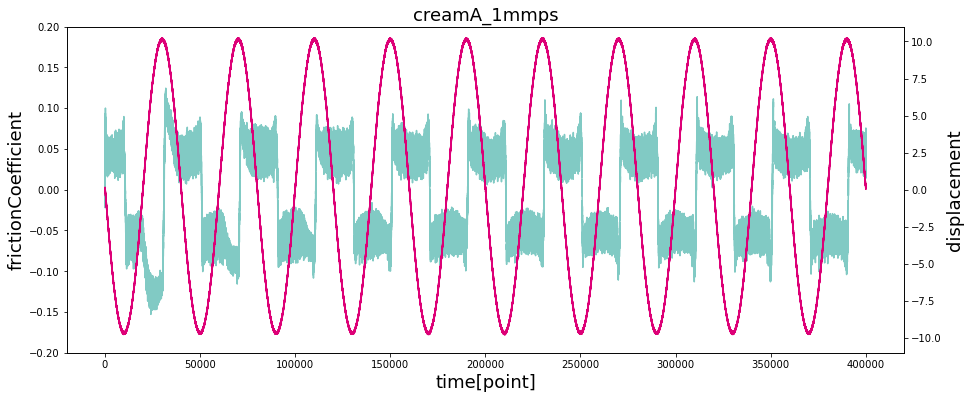

In [45]:
v_inst_creamA_1mmps.plot_rawData(v_range_rawData)

ノイズに見える部分の特徴があるか？

→　目視ではなさそう

要素に分解後正規性があるかどうかで判断する

<AxesSubplot:>

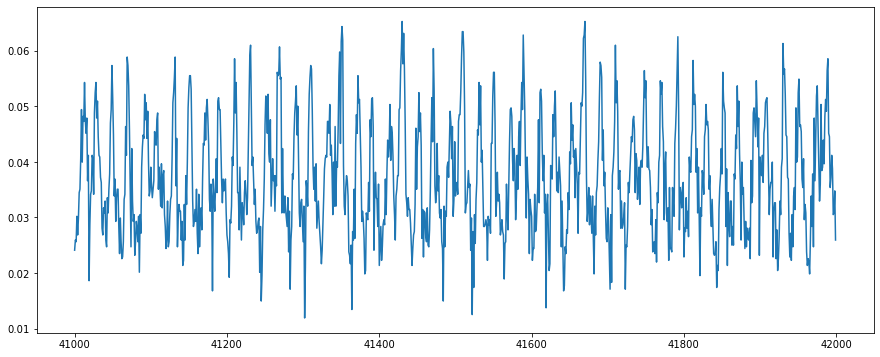

In [46]:
v_inst_creamA_1mmps.data[int(v_inst_creamA_1mmps.freq+1000):int(v_inst_creamA_1mmps.freq+2000)]['frictionCoefficient'].plot()

In [47]:
# creamA_10mmps
v_inst_creamA_10mmps = FrictionData('creamA_10mmps', v_data_conditions)
# v_inst_creamA_10mmps.data
v_inst_creamA_10mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,40156.000000,40156.000000,40156.000000,40156.0,40156.000000,40156.000000
mean,20177.500000,-0.551284,0.170342,0.0,-0.005513,0.037904
std,11592.183041,4.307502,7.015741,0.0,0.043075,0.021192
min,100.000000,-14.739990,-9.774780,0.0,-0.147400,0.000000
25%,10138.750000,-3.753662,-6.866455,0.0,-0.037537,0.023804
50%,20177.500000,-0.305176,0.085449,0.0,-0.003052,0.032959
75%,30216.250000,2.624512,7.215118,0.0,0.026245,0.047302
max,40255.000000,16.143800,10.244750,0.0,0.161438,0.161438


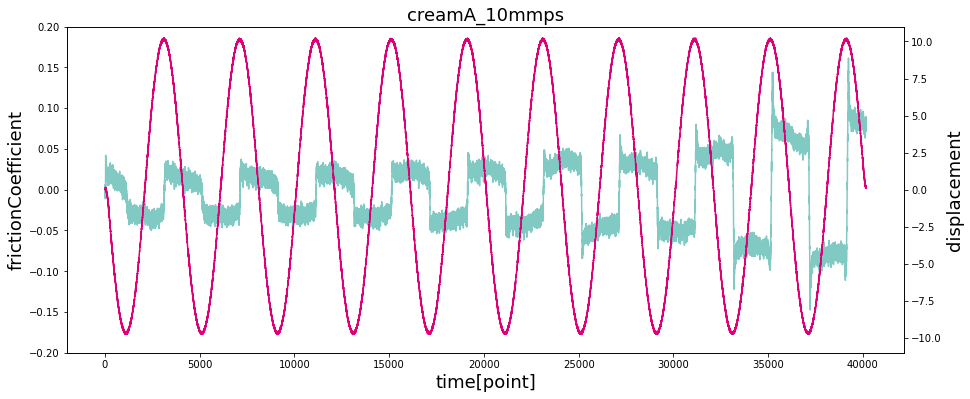

In [48]:
v_inst_creamA_10mmps.plot_rawData(v_range_rawData)

In [49]:
# creamA_40mmps
v_inst_creamA_40mmps = FrictionData('creamA_40mmps', v_data_conditions)
# v_inst_creamA_40mmps.data
v_inst_creamA_40mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,10135.000000,10135.000000,10135.000000,10135.0,10135.000000,10135.000000
mean,5167.000000,-0.828428,0.144883,0.0,-0.008284,0.060294
std,2925.866823,6.594318,6.976303,0.0,0.065943,0.027953
min,100.000000,-13.244630,-9.854126,0.0,-0.132446,0.000000
25%,2633.500000,-6.591797,-6.832886,0.0,-0.065918,0.040283
50%,5167.000000,-0.244141,0.033569,0.0,-0.002441,0.057678
75%,7700.500000,4.608154,7.119751,0.0,0.046082,0.080261
max,10234.000000,18.890380,10.232540,0.0,0.188904,0.188904


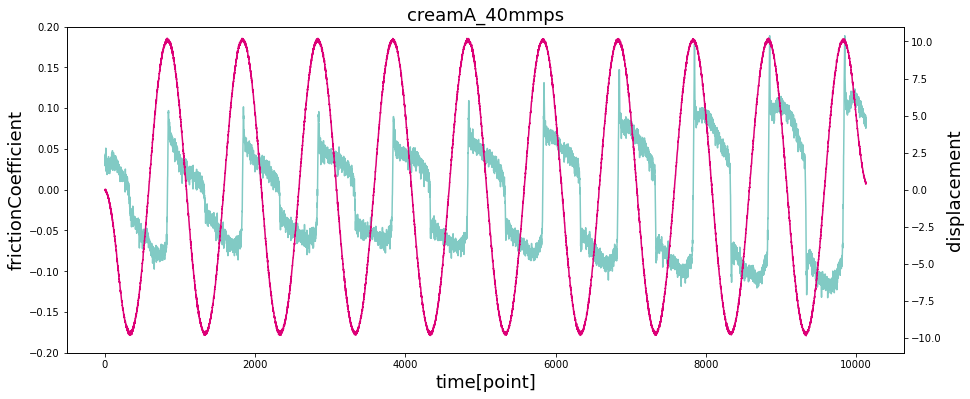

In [50]:
v_inst_creamA_40mmps.plot_rawData(v_range_rawData)

In [51]:
# creamB_1mmps
v_inst_creamB_1mmps = FrictionData('creamB_1mmps', v_data_conditions)
# v_inst_creamB_1mmps.data
v_inst_creamB_1mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,400078.000000,400078.000000,400078.000000,400078.0,400078.000000,400078.000000
mean,200138.500000,-0.700731,0.136894,0.0,-0.007007,0.081436
std,115492.714835,8.523391,7.028977,0.0,0.085234,0.026117
min,100.000000,-18.707280,-9.835815,0.0,-0.187073,0.000000
25%,100119.250000,-8.758545,-6.915283,0.0,-0.087585,0.067749
50%,200138.500000,-0.854492,0.073242,0.0,-0.008545,0.081177
75%,300157.750000,7.537842,7.202148,0.0,0.075378,0.096130
max,400177.000000,17.120360,10.232540,0.0,0.171204,0.187073


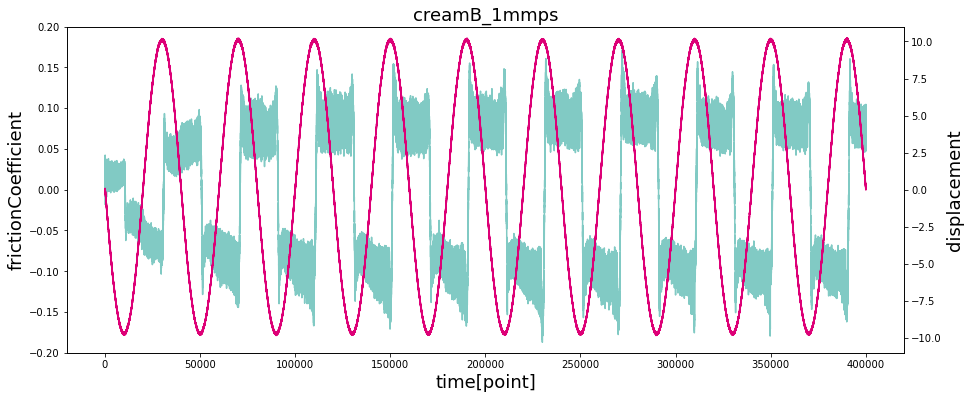

In [52]:
v_inst_creamB_1mmps.plot_rawData(v_range_rawData)

In [53]:
# creamB_10mmps
v_inst_creamB_10mmps = FrictionData('creamB_10mmps', v_data_conditions)
# v_inst_creamB_10mmps.data
v_inst_creamB_10mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,40133.000000,40133.000000,40133.000000,40133.0,40133.000000,40133.000000
mean,20166.000000,-0.421805,0.112619,0.0,-0.004218,0.078053
std,11585.543513,8.057983,7.018627,0.0,0.080580,0.020457
min,100.000000,-18.035890,-9.838867,0.0,-0.180359,0.000000
25%,10133.000000,-8.483887,-6.930542,0.0,-0.084839,0.066223
50%,20166.000000,1.617432,0.042725,0.0,0.016174,0.081177
75%,30199.000000,7.720947,7.159424,0.0,0.077209,0.092163
max,40232.000000,13.610840,10.189820,0.0,0.136108,0.180359


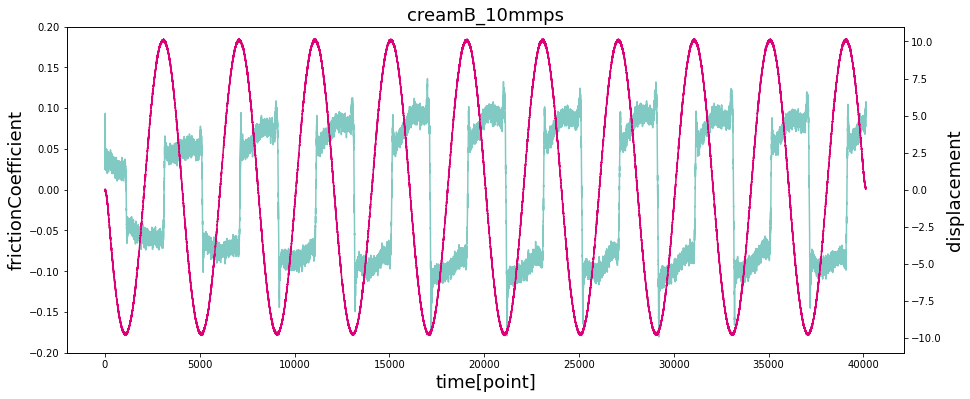

In [54]:
v_inst_creamB_10mmps.plot_rawData(v_range_rawData)

In [55]:
# creamB_40mmps
v_inst_creamB_40mmps = FrictionData('creamB_40mmps', v_data_conditions)
# v_inst_creamB_40mmps.data
v_inst_creamB_40mmps.data.describe()

Type error : machine type is not defined.


,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,10115.00000,10115.000000,10115.000000,10115.0,10115.000000,10115.000000
mean,5157.00000,-0.608599,0.167290,0.0,-0.006086,0.058723
std,2920.09332,6.137941,6.983388,0.0,0.061379,0.018862
min,100.00000,-10.864260,-9.805298,0.0,-0.108643,0.000000
25%,2628.50000,-6.683350,-6.802368,0.0,-0.066834,0.046387
50%,5157.00000,0.885010,0.079346,0.0,0.008850,0.060425
75%,7685.50000,5.401611,7.130432,0.0,0.054016,0.072937
max,10214.00000,9.399414,10.266110,0.0,0.093994,0.108643


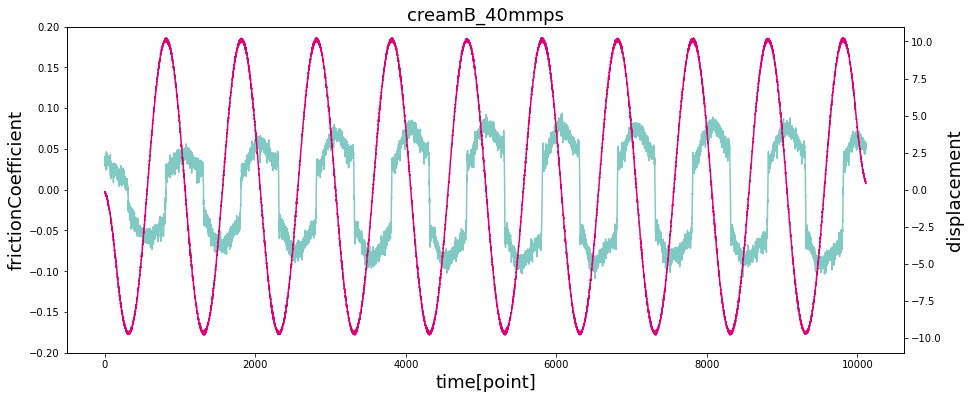

In [56]:
v_inst_creamB_40mmps.plot_rawData(v_range_rawData)

# トレンド x 周期成分 x 残差に分解
上から観測値，トレンド，周期成分，残差

測定開始直後に大きな残差がある

C:\Users\scomi\GoogleDrive_Nagi\Friction\frictionData.py:81: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  self.decomposed = sm.tsa.seasonal_decompose(self.data['frictionCoefficient'], freq=int(self.freq))


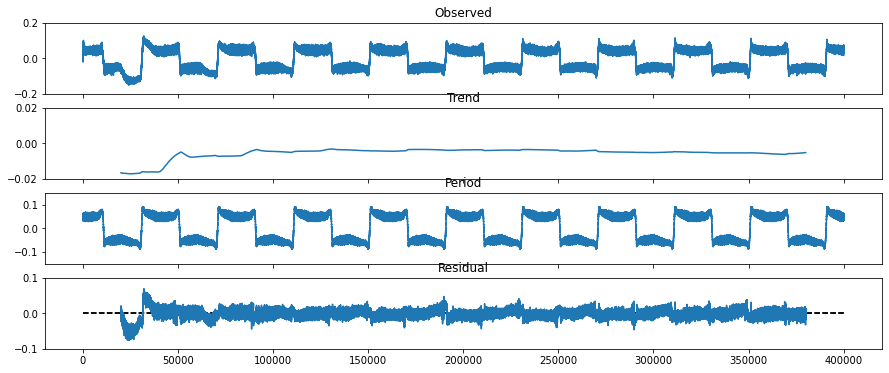

In [57]:
# creamA_1mmps
v_inst_creamA_1mmps.decompose()

9, 10往復目に大きな残差

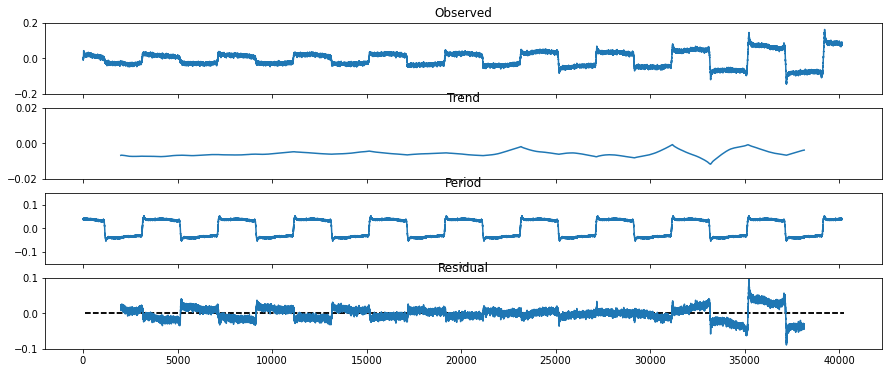

In [58]:
# creamA_10mmps
v_inst_creamA_10mmps.decompose()

9, 10往復目に大きな残差

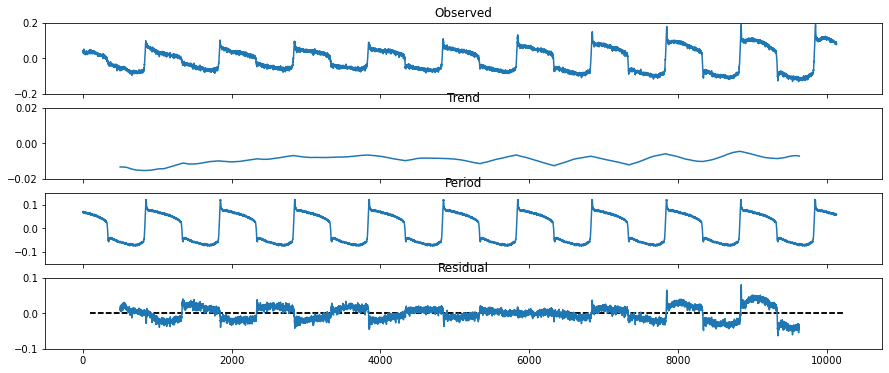

In [59]:
# creamA_40mmps
v_inst_creamA_40mmps.decompose()

測定開始直後に大きな残差

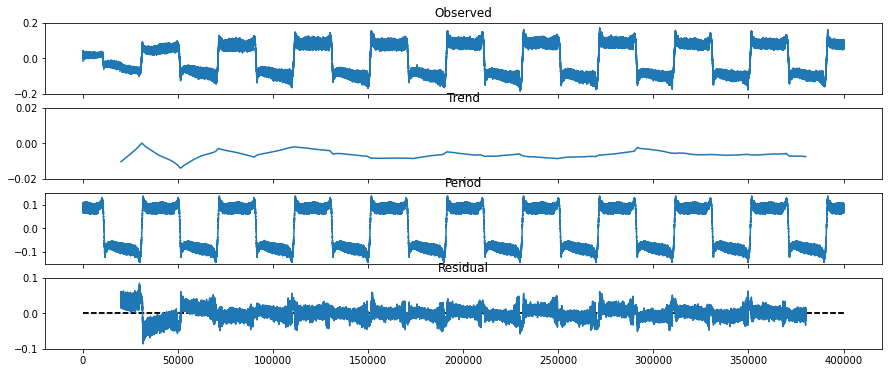

In [60]:
# creamB_1mmps
v_inst_creamB_1mmps.decompose()

測定開始直後に大きな残差

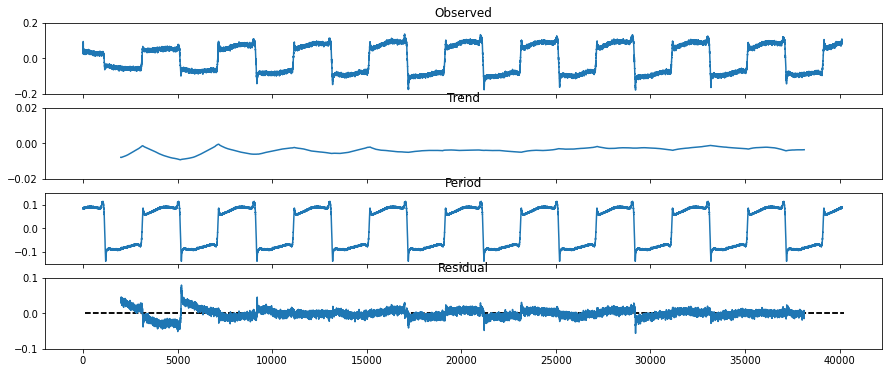

In [61]:
# creamB_10mmps
v_inst_creamB_10mmps.decompose()

測定開始直後に大きな残差

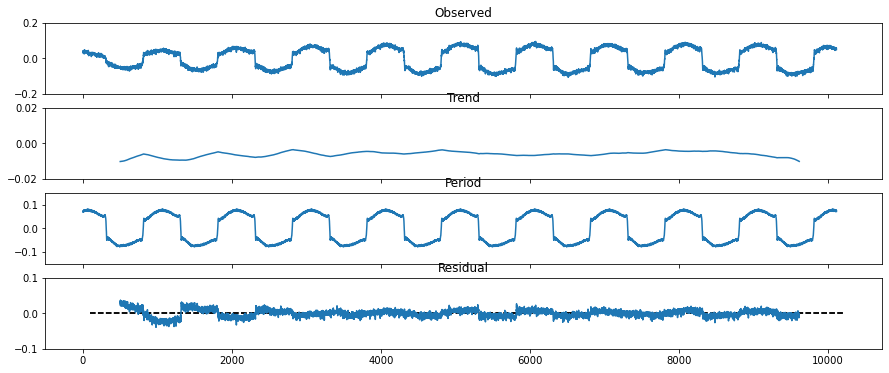

In [62]:
# creamB_40mmps
v_inst_creamB_40mmps.decompose()

# 摩擦係数の絶対値を取ってみる

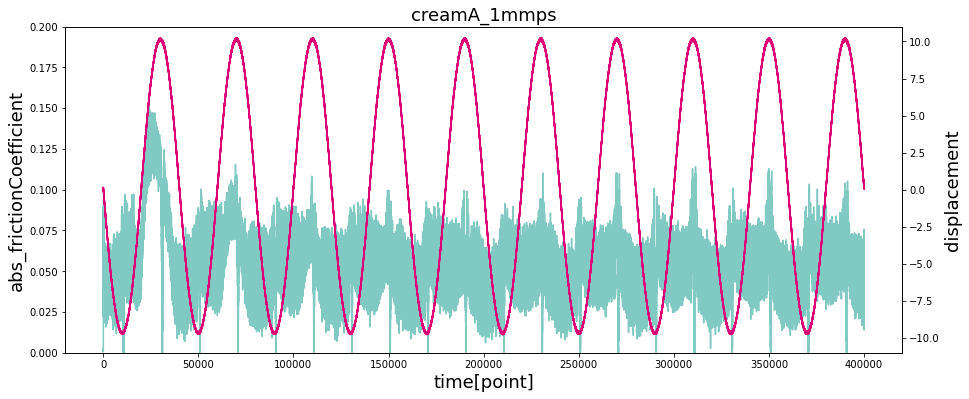

In [63]:
# creamA_1mmps
v_inst_creamA_1mmps.plot_absData(v_range_absData)

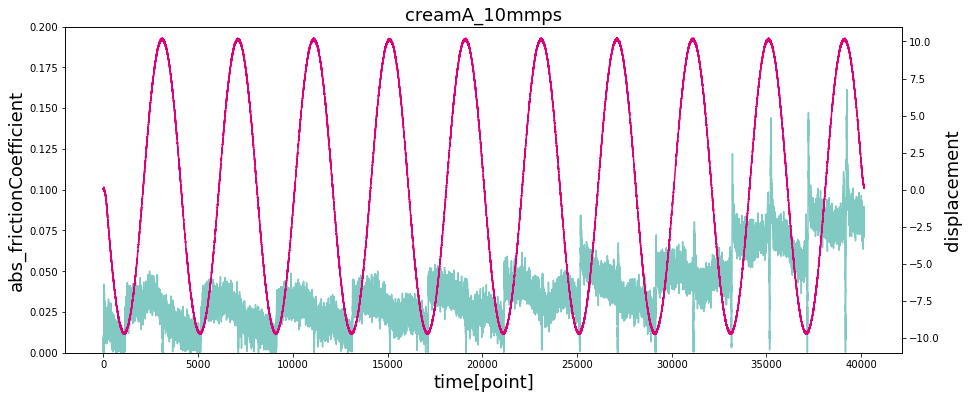

In [64]:
# creamA_10mmps
v_inst_creamA_10mmps.plot_absData(v_range_absData)

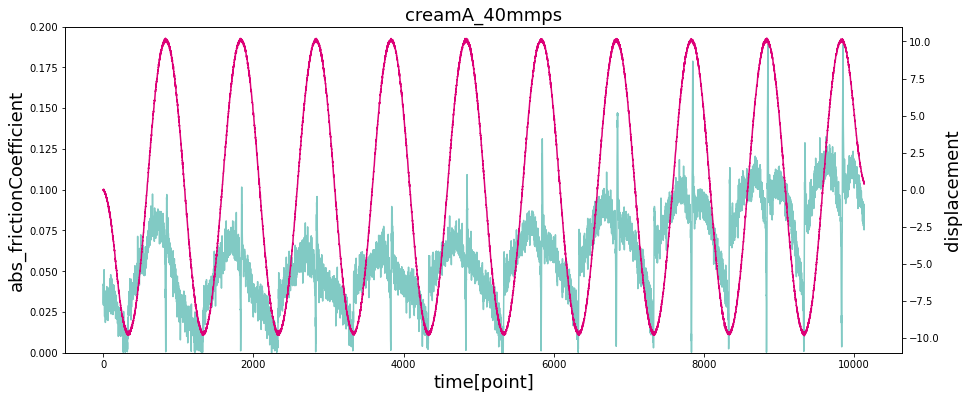

In [65]:
# creamA_40mmps
v_inst_creamA_40mmps.plot_absData(v_range_absData)

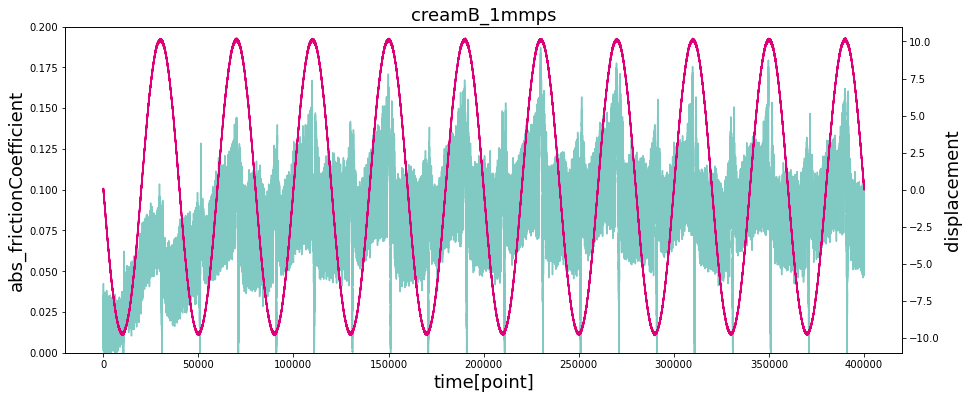

In [66]:
# creamB_1mmps
v_inst_creamB_1mmps.plot_absData(v_range_absData)

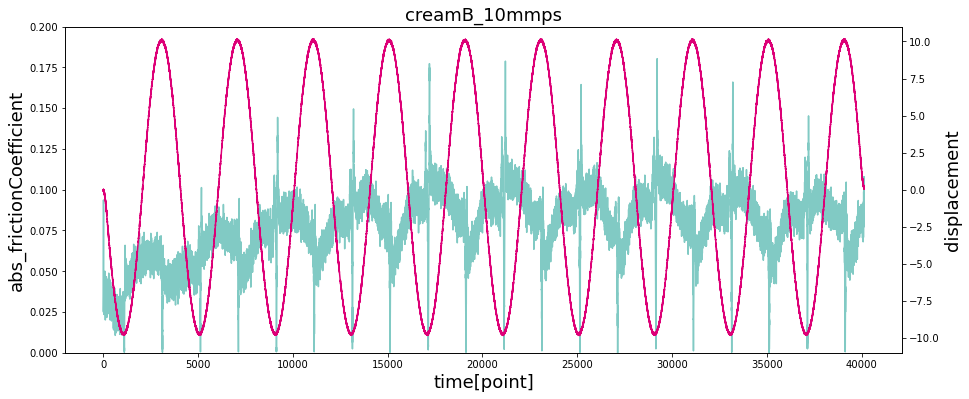

In [67]:
# creamB_10mmps
v_inst_creamB_10mmps.plot_absData(v_range_absData)

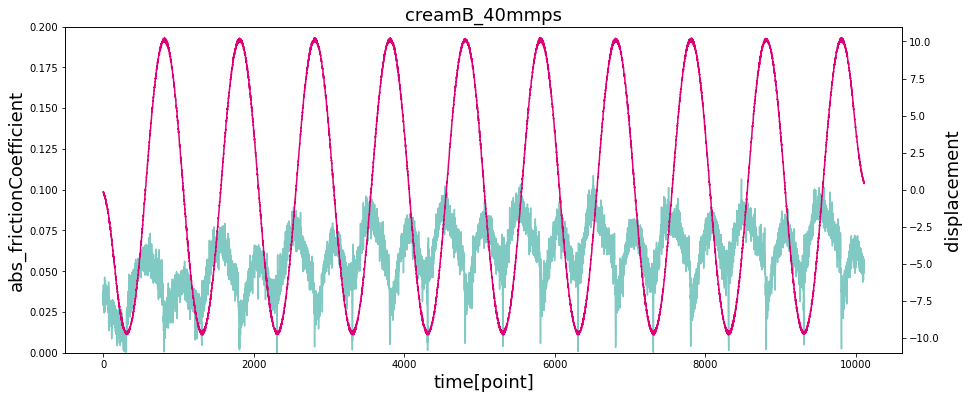

In [68]:
# creamB_40mmps
v_inst_creamB_40mmps.plot_absData(v_range_absData)

C:\Users\scomi\GoogleDrive_Nagi\Friction\frictionData.py:103: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  self.decomposed_abs = sm.tsa.seasonal_decompose(self.data['abs_frictionCoefficient'], freq=int(self.freq))


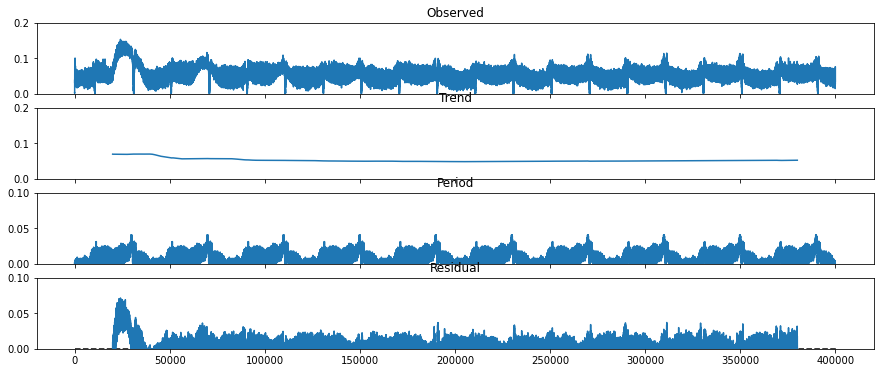

In [69]:
# creamA_1mmps
v_inst_creamA_1mmps.decompose_abs()

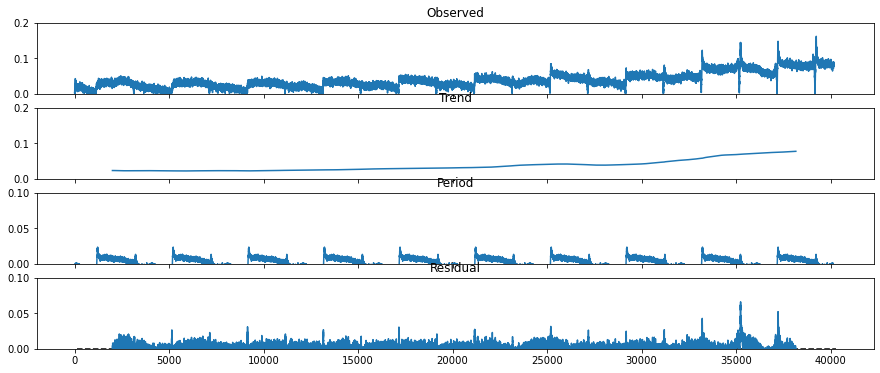

In [70]:
# creamA_10mmps
v_inst_creamA_10mmps.decompose_abs()

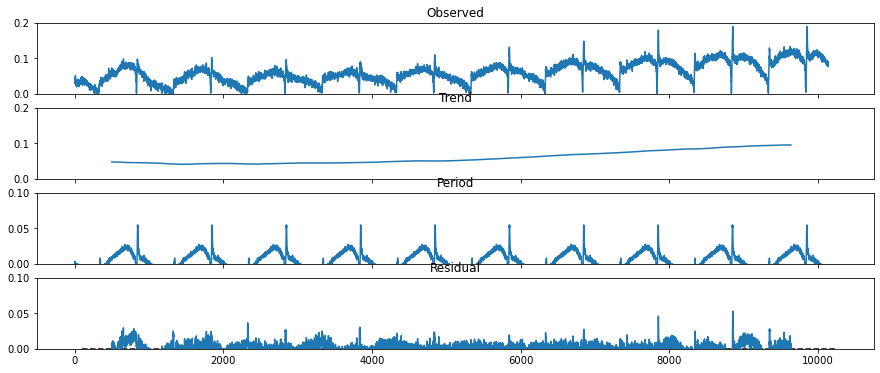

In [71]:
# creamA_40mmps
v_inst_creamA_40mmps.decompose_abs()

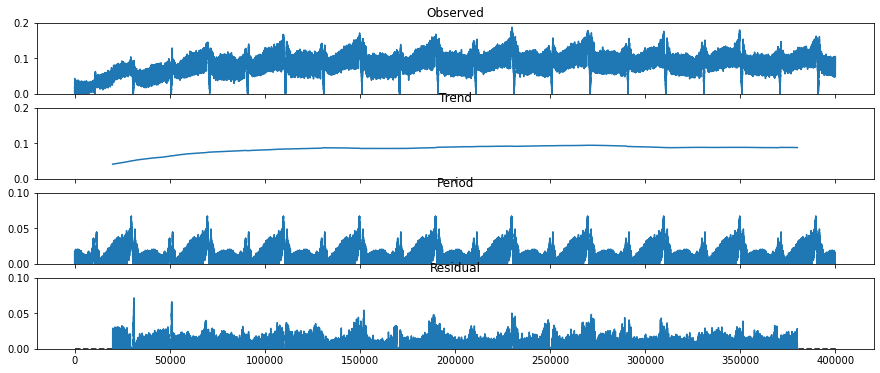

In [72]:
# creamB_1mmps
v_inst_creamB_1mmps.decompose_abs()

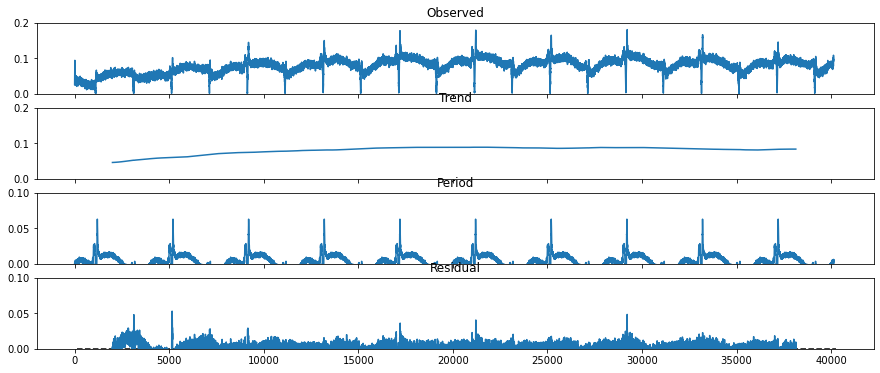

In [73]:
# creamB_10mmps
v_inst_creamB_10mmps.decompose_abs()

In [ ]:
# creamB_40mmps
v_inst_creamB_40mmps.decompose_abs()

### 結論
* 絶対値を取ったほうが見やすい
* creamAの1mmps以外は上昇傾向のトレンドが見える
* 方向転換時のstick-and-slipは毎周期起こる程度に加えて，それよりも激しく（？）出る周期がある（とく終盤の周期）
* stick-and-slip（毎周期起こる分）は大きくなりやすい摺動速度があるように見える  
速いほど大きいといった傾向は見えない

※今回は乗法モデルというモデルを使った  
観測値 = トレンド x 周期成分 x 残差  
つまり、トレンドや周期成分の振幅の増加による影響は残差から除かれている


### 今後の方向性
* (SARIMAでモデル化→パラメータフィッティング)
* stick-and-slipを強く出ている部分について詳細なモデルを作成する
* 周期成分とテーブルの変位の位相差を取ることで，摺動速度と位相のズレの関係を考察する

### 確認したいこと
* 摩擦力の向きに意味はあるか？
* ロードセルの仕組み +-で非対称性があるが，これに意味があるか，測定上の誤差か

2020.12.25  
* URL送る　https://www.anaconda.com/products/individual#Downloads
* 反転時の摩擦係数の急上昇 くさび効果
* クリームの吐き出されやすさが速度依存 : 反転時の摩擦係数の急上昇（周期成分）の極大値から吐き出されやすさを推定できる？
* 速度に対する摩擦係数を取る　周期ごとに分解
* 極大値に位相ズレがないか確認する
* ディリクレ核で反転時における急激な摩擦係数の上昇成分を抜き出す
* 測定開始直後と最後のデータは抜く


In [ ]:
# creamA_1mmps
v_inst_creamA_1mmps.adf()
# Not enough memory

In [ ]:
# creamA_10mmps
v_inst_creamA_10mmps.adf()

In [ ]:
# creamA_40mmps
v_inst_creamA_40mmps.adf()

In [ ]:
# creamB_1mmps
# v_inst_creamB_1mmps.adf()
# Not enough memory

In [ ]:
# creamB_10mmps
v_inst_creamB_10mmps.adf()

In [ ]:
# creamA_40mmps
v_inst_creamB_40mmps.adf()